In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% ! important; }<style>"))

In [2]:
# Importing the required libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import warnings

# Ignore warnings for this cell
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

In [3]:
# Fucntion to convert date and time to pandas date/time format and extract day/month or hour/minute

def date_time_conversion(df, col):
    if "date" in col:
        # Convert date to pandas date format and extracting day and month
        df[col] = pd.to_datetime(df[col], dayfirst=True)
        df["travel_day"] = df[col].dt.day
        df["travel_month"] = df[col].dt.month
        
    if "time" in col:
        # Convert time to pandas time format and extracting hour and minute
        df[col] = pd.to_datetime(df[col])
        col_name = col.split("_")[0]
        df[col_name+"_hour"] = df[col].dt.hour
        df[col_name+"_minute"] = df[col].dt.minute
        
    df.drop(col, axis=1, inplace=True)
    return df

In [4]:
# Fucntion to convert time in string format(02h 35m) to minutes 

def convert_to_mins(df, col):
    df["duration_in_mins"] = df[col].apply(lambda x: int(x.split(" ")[0][:-1])*60 + int(x.split(" ")[1][:-1]))
    df.drop(col, axis=1, inplace=True)
    return df

In [5]:
# Removing all the unwanted characters/formating of columns

def col_formating(df, col, delimeter):
    df[col] = df[col].str.split(delimeter).str[0].str.strip()
    return df

In [6]:
# Fucntion to One hot encode nominal data 

def col_encode(df, cols, LabelEncoder='', prefix='', encode_type='onehotencode', second_time=False):
    if encode_type == 'onehotencode':
        df = pd.get_dummies(df, columns=cols, prefix=prefix)
    elif encode_type == 'labelencode':
        if second_time == False:
            df[cols] = LabelEncoder.fit_transform(df[cols])
        else:
            df[cols] = LabelEncoder.transform(df[cols])
        
    return df

In [7]:
# Fucntion to converting the dtype of a column

def convert_float_to_int(df, col, replace='', convert_to_dtype=int):
    if len(replace) > 0:
        df[col] = df[col].str.replace(replace, "").astype(convert_to_dtype)
    else:
        df[col] = df[col].astype(convert_to_dtype)
    return df

In [8]:
# Function to remove all the unwanted codes

def drop_unwanted_cols(df, cols, axis=1):
    df.drop(cols, axis=axis, inplace=True)
    return df

## Business Class

In [9]:
# Reading the business class dataset

df_business = pd.read_csv("business.csv")

df_business["airline"] = df_business["airline"].apply(lambda x: x + " Business")

In [10]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India Business,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India Business,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India Business,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India Business,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India Business,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


# Economy class

In [11]:
# Reading the business class dataset

df_economy = pd.read_csv("economy.csv")


In [12]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


## Combining Business class dataset and Economy class dataset

In [13]:
# Combining both economy and business class

df = pd.concat([df_business, df_economy], axis=0, ignore_index=True)

In [14]:
# Printing first 5 rows of the combined df

df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India Business,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India Business,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India Business,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India Business,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India Business,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [15]:
# Shape of the business class dataset

df.shape

(300261, 11)

In [16]:
# Checking to see if there are any null/nan values present

df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [17]:
# Information about the columns, dtype, non null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.2+ MB


In [18]:
# First 5 rows before pre-processing

df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India Business,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India Business,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India Business,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India Business,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India Business,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


# Feature Creation

In [19]:
# Convert date to pandas date format and extracting day and month
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["travel_day"] = df["date"].dt.day
df["travel_month"] = df["date"].dt.month

In [20]:
# Convert time to pandas time format and extracting hour and minute
df["dep_time"] = pd.to_datetime(df["dep_time"])
df["departure_hour"] = df["dep_time"].dt.hour
df["departure_minute"] = df["dep_time"].dt.minute

In [21]:
# Convert time to pandas time format and extracting hour and minute
df["arr_time"] = pd.to_datetime(df["arr_time"])
df["arrival_hour"] = df["arr_time"].dt.hour
df["arrival_minute"] = df["arr_time"].dt.minute

In [22]:
# Below function is to correct the values in column "time_taken" which had a different format

def convert_time_to_same_format(x):
    time_taken_split_arr = x.split(".")
    if len(time_taken_split_arr) > 1:
        string = time_taken_split_arr[0] + "h " +  time_taken_split_arr[1] + "m"
        return string
    return x

df["time_taken"] = df["time_taken"].apply(lambda x: convert_time_to_same_format(x))

df["duration_in_mins"] = df["time_taken"].apply(lambda x: int(x.split(" ")[0][:-1])*60 + int(x.split(" ")[1][:-1]))

In [23]:
df["stop"] = df["stop"].str.split("\n").str[0].str.strip()

In [26]:
df["price"] = df["price"].str.replace(",", "").astype(int)

In [27]:
df.drop(["ch_code", "num_code"], axis=1, inplace=True)

In [28]:
df["Weekend"] = (df["date"].dt.dayofweek > 4).astype(int)

In [29]:
def get_time_of_day(x):
    if ((x >= 0) & (x < 6)):
        return "Early Morning"
    elif ((x >= 6) & (x < 12)):
        return "Morning"
    elif ((x >= 12) & (x < 18)):
        return "Noon"
    else:
        return "Night"

df["departure_time_of_day"] = df["departure_hour"].apply(lambda x: get_time_of_day(x))
df["arrival_time_of_day"] = df["arrival_hour"].apply(lambda x: get_time_of_day(x))

In [31]:
# Creating a new column to represent the day of the week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['date'].dt.dayofweek

# Maping the day of the week to its name (Monday, Tuesday, etc.)
day_name_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['Day_of_Week'] = df['Day_of_Week'].map(day_name_map)

# Now, 'Day_of_Week' column will contain the day names

In [33]:
# First 5 rows after data preprocessing and extracting the required features 

df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,travel_day,travel_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_in_mins,Weekend,departure_time_of_day,arrival_time_of_day,Day_of_Week
0,2022-02-11,Air India Business,2023-12-13 18:00:00,Delhi,02h 00m,non-stop,2023-12-13 20:00:00,Mumbai,25612,11,2,18,0,20,0,120,0,Night,Night,Friday
1,2022-02-11,Air India Business,2023-12-13 19:00:00,Delhi,02h 15m,non-stop,2023-12-13 21:15:00,Mumbai,25612,11,2,19,0,21,15,135,0,Night,Night,Friday
2,2022-02-11,Air India Business,2023-12-13 20:00:00,Delhi,24h 45m,1-stop,2023-12-13 20:45:00,Mumbai,42220,11,2,20,0,20,45,1485,0,Night,Night,Friday
3,2022-02-11,Air India Business,2023-12-13 21:25:00,Delhi,26h 30m,1-stop,2023-12-13 23:55:00,Mumbai,44450,11,2,21,25,23,55,1590,0,Night,Night,Friday
4,2022-02-11,Air India Business,2023-12-13 17:15:00,Delhi,06h 40m,1-stop,2023-12-13 23:55:00,Mumbai,46690,11,2,17,15,23,55,400,0,Noon,Night,Friday


# Data Visualisation

In [34]:
df_original = df.copy()

In [35]:
df_business.shape

(93487, 11)

In [129]:
df_economy.shape

(206774, 11)

In [130]:
df.shape

(300261, 20)

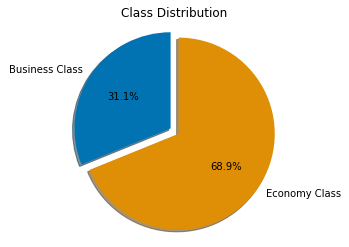

In [37]:
import matplotlib.pyplot as plt

df_bsuiness_per = len(df_business) / (len(df_business) + len(df_economy))

df_economy_per = len(df_economy) / (len(df_business) + len(df_economy))

labels = ['Business Class', 'Economy Class']
sizes = [df_bsuiness_per, df_economy_per]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

colors = sns.color_palette("colorblind", len(labels))

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle=90, shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Class Distribution')
plt.show()

In [40]:
df_business = df[df["airline"].str.contains("Business")]

In [41]:
df_economy = df[~df["airline"].str.contains("Business")]

In [42]:
sns.set(style="darkgrid", palette='deep') 

In [43]:
colors = sns.color_palette("colorblind")

In [44]:
df["class"] = df["airline"].apply(lambda x: "Business" if "Business" in x else "Economy")

Text(0, 0.5, 'Price')

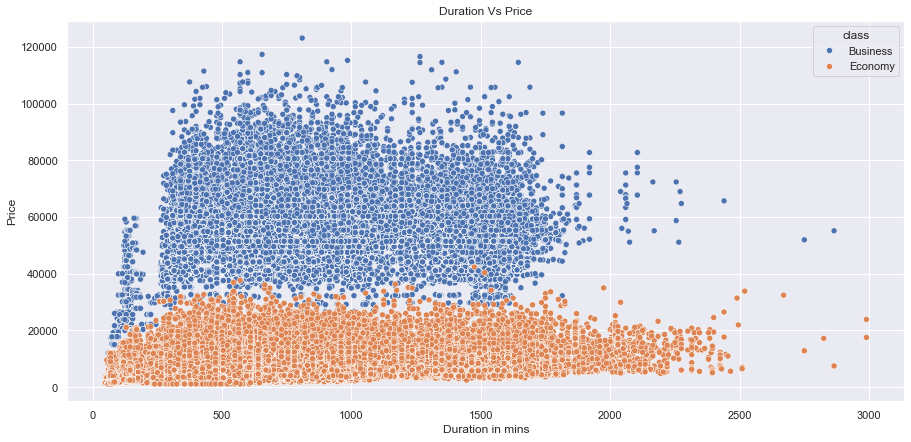

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="duration_in_mins", y="price", color='blue', marker='o', hue='class', data=df)
plt.title("Duration Vs Price")
plt.xlabel("Duration in mins")
plt.ylabel("Price")

In [46]:
business_color = '#1D61B2'
economy_color = '#B88B23'

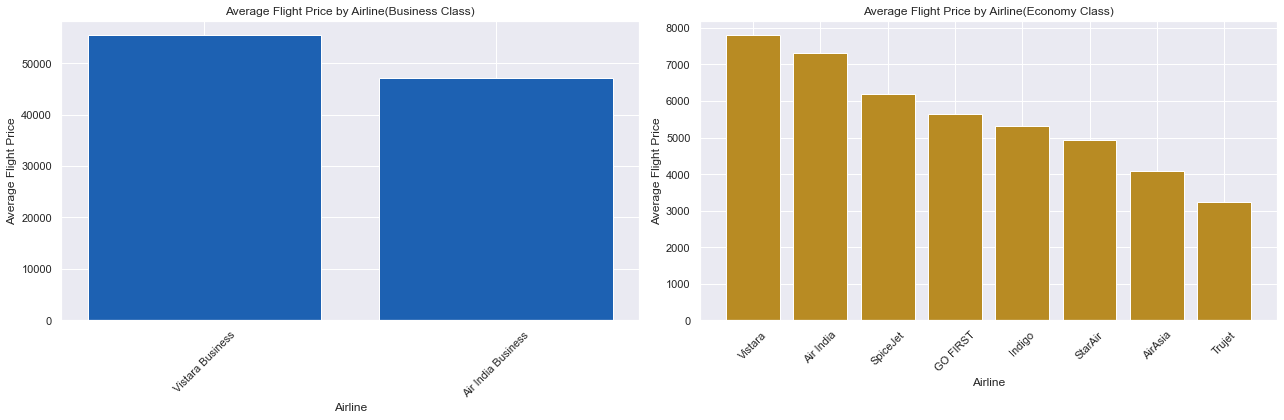

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

airline_prices_business = df_business.groupby("airline")["price"].mean().reset_index()
airline_prices_business = airline_prices_business.sort_values(by='price', ascending=False)
#FDAF19
axes[0].bar(airline_prices_business['airline'], airline_prices_business['price'], color=business_color)
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Average Flight Price')
axes[0].set_title('Average Flight Price by Airline(Business Class)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


colors = sns.color_palette("deep")
airline_prices_economy = df_economy.groupby("airline")["price"].mean().reset_index()
airline_prices_economy = airline_prices_economy.sort_values(by='price', ascending=False)

axes[1].bar(airline_prices_economy['airline'], airline_prices_economy['price'], color=economy_color)
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Average Flight Price')
axes[1].set_title('Average Flight Price by Airline(Economy Class)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Observatrion
**Business Class**
- Average flight price of Vistara is higher than Air India

**Economy Class**
- Vistara is the most expensive airline
- StarAir, AirAsia, Trujet has comparitively low avergae ticket price when compared with other airlines. 


In [48]:
sns.set(style="darkgrid", palette='viridis') 

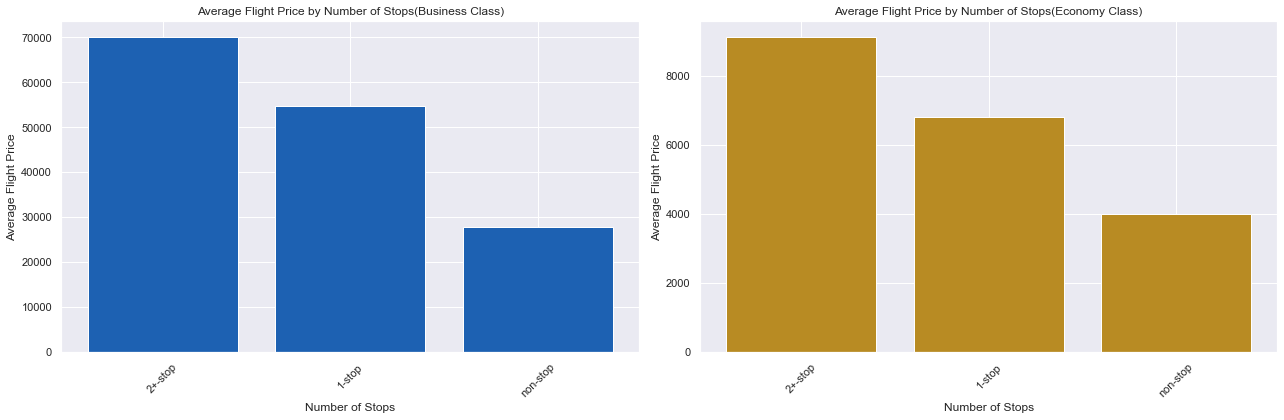

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

airline_prices_business = df_business.groupby("stop")["price"].mean().reset_index()
airline_prices_business = airline_prices_business.sort_values(by='price', ascending=False)

axes[0].bar(airline_prices_business['stop'], airline_prices_business['price'], color=business_color)
axes[0].set_xlabel('Number of Stops')
axes[0].set_ylabel('Average Flight Price')
axes[0].set_title('Average Flight Price by Number of Stops(Business Class)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



airline_prices_economy = df_economy.groupby("stop")["price"].mean().reset_index()
airline_prices_economy = airline_prices_economy.sort_values(by='price', ascending=False)

axes[1].bar(airline_prices_economy['stop'], airline_prices_economy['price'], color=economy_color)
axes[1].set_xlabel('Number of Stops')
axes[1].set_ylabel('Average Flight Price')
axes[1].set_title('Average Flight Price by Number of Stops(Economy Class)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Obervation
- There is a massive price change by increasing the number of stops
- When the stops increases price also increases, therefore this can be considered as a positivly correlated with flight price

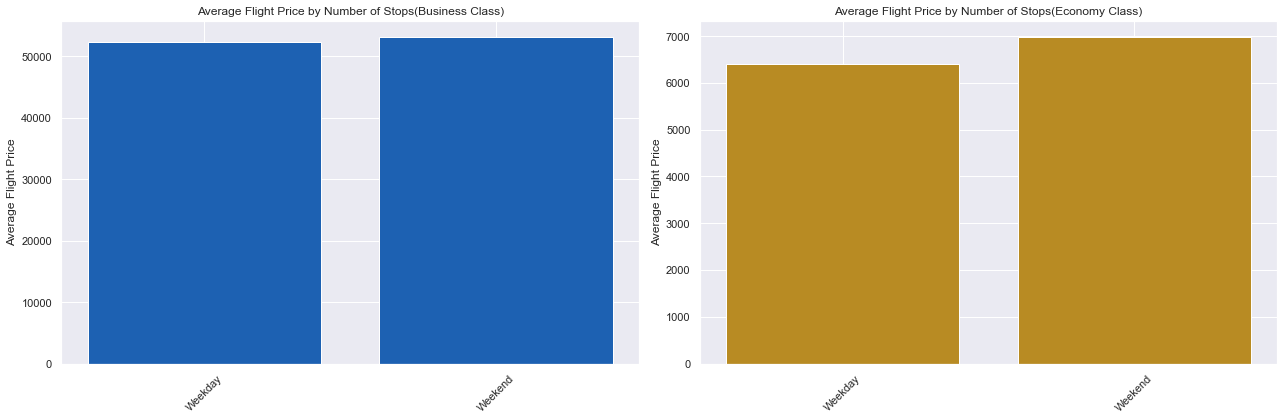

In [50]:
sns.set(style="darkgrid", palette='cubehelix') 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

airline_prices_business = df_business.groupby("Weekend")["price"].mean().reset_index()
airline_prices_business = airline_prices_business.sort_values(by='price', ascending=False)

axes[0].bar(airline_prices_business['Weekend'], airline_prices_business['price'], color=business_color)
axes[0].set_xticks([0, 1], ['Weekday', 'Weekend']) 
axes[0].set_ylabel('Average Flight Price')
axes[0].set_title('Average Flight Price by Number of Stops(Business Class)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



airline_prices_economy = df_economy.groupby("Weekend")["price"].mean().reset_index()
airline_prices_economy = airline_prices_economy.sort_values(by='price', ascending=False)

axes[1].bar(airline_prices_economy['Weekend'], airline_prices_economy['price'], color=economy_color)
axes[1].set_xticks([0, 1], ['Weekday', 'Weekend']) 
axes[1].set_ylabel('Average Flight Price')
axes[1].set_title('Average Flight Price by Number of Stops(Economy Class)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Observation
- Flight price in weekends are more than weekdays

In [51]:
average_prices_by_day = df_business.groupby('Day_of_Week')['price'].mean().reset_index()

# Defining the order of days of the week for proper ordering in the chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the data by the specified order
average_prices_by_day['Day_of_Week'] = pd.Categorical(average_prices_by_day['Day_of_Week'], categories=day_order, ordered=True)
average_prices_by_day = average_prices_by_day.sort_values('Day_of_Week')

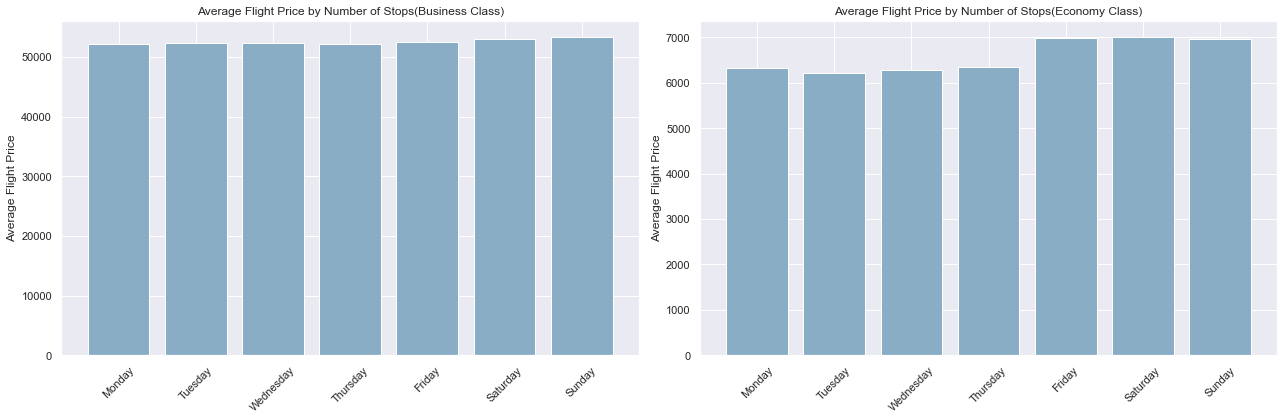

In [52]:
sns.set(style="darkgrid", palette='twilight') 
# sns.color_palette("mako", as_cmap=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

airline_price_bsuiness = df_business.groupby('Day_of_Week')['price'].mean().reset_index()

# Defining the order of days of the week for proper ordering in the chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the data by the specified order
airline_price_bsuiness['Day_of_Week'] = pd.Categorical(airline_price_bsuiness['Day_of_Week'], categories=day_order, ordered=True)
airline_price_bsuiness = airline_price_bsuiness.sort_values('Day_of_Week')

axes[0].bar(airline_price_bsuiness['Day_of_Week'], airline_price_bsuiness['price'])
axes[0].set_ylabel('Average Flight Price')
axes[0].set_title('Average Flight Price by Number of Stops(Business Class)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



airline_prices_economy = df_economy.groupby('Day_of_Week')['price'].mean().reset_index()

# Defining the order of days of the week for proper ordering in the chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the data by the specified order
airline_prices_economy['Day_of_Week'] = pd.Categorical(airline_prices_economy['Day_of_Week'], categories=day_order, ordered=True)
airline_prices_economy = airline_prices_economy.sort_values('Day_of_Week')


axes[1].bar(airline_prices_economy['Day_of_Week'], airline_prices_economy['price'])
axes[1].set_ylabel('Average Flight Price')
axes[1].set_title('Average Flight Price by Number of Stops(Economy Class)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Observation
-  It appears that flight prices tend to be higher on Fridays, Saturday and Sundays. This could be due to the fact that these days are typically associated with weekend travel, and airlines may charge a premium for flights during peak leisure travel periods.
-  Fridays are often popular days for business travelers, while Sundays are common for return trips from weekend getaways or vacations. Business travelers may be willing to pay more for flights, and this could contribute to higher average prices.

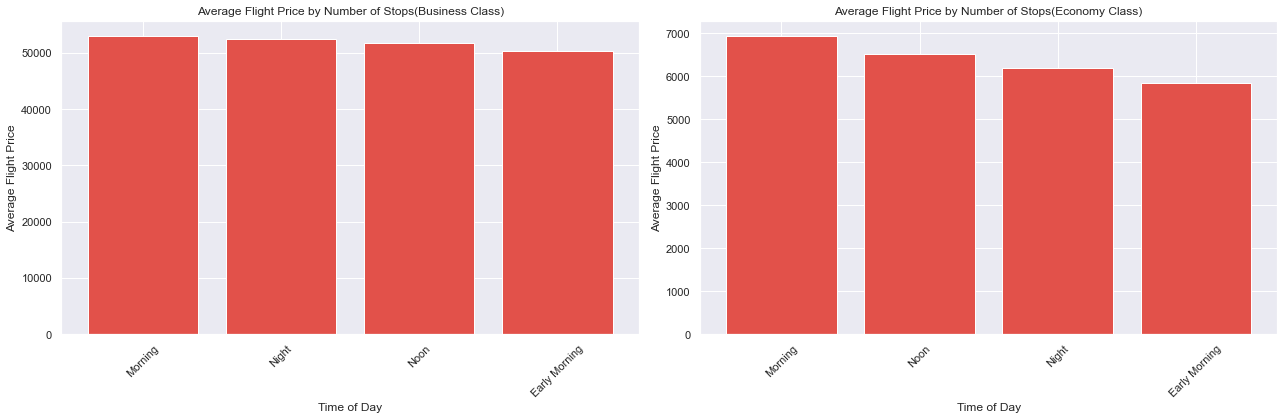

In [53]:
sns.set(style="darkgrid", palette='Spectral') 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

airline_prices_business = df_business.groupby("departure_time_of_day")["price"].mean().reset_index()
airline_prices_business = airline_prices_business.sort_values(by='price', ascending=False)

axes[0].bar(airline_prices_business['departure_time_of_day'], airline_prices_business['price'])
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Average Flight Price')
axes[0].set_title('Average Flight Price by Number of Stops(Business Class)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



airline_prices_economy = df_economy.groupby("departure_time_of_day")["price"].mean().reset_index()
airline_prices_economy = airline_prices_economy.sort_values(by='price', ascending=False)

axes[1].bar(airline_prices_economy['departure_time_of_day'], airline_prices_economy['price'])
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Average Flight Price')
axes[1].set_title('Average Flight Price by Number of Stops(Economy Class)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Observations
- People less tend to travel in the early mornings and so the price is also low
- Most of the flights are expensive in the morning

In [54]:
def get_time_of_day(x):
    if ((x >= 0) & (x < 6)):
        return "Early Morning"
    elif ((x >= 6) & (x < 12)):
        return "Morning"
    elif ((x >= 12) & (x < 18)):
        return "Noon"
    else:
        return "Night"

Text(0.5, 1.0, 'Flight Frequency by Hour')

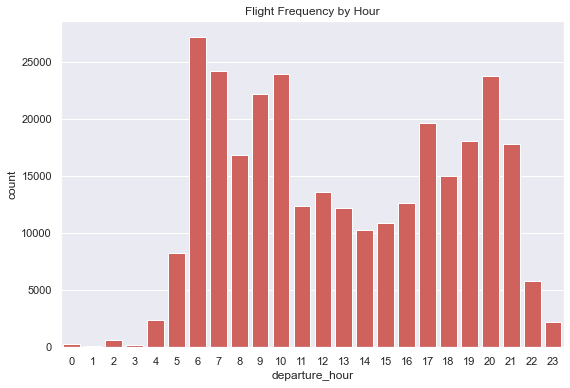

In [55]:
plt.figure(figsize=(9, 6))
sns.countplot(x='departure_hour',data=df)
plt.title("Flight Frequency by Hour")

In [56]:
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,travel_day,travel_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_in_mins,Weekend,departure_time_of_day,arrival_time_of_day,Day_of_Week
0,2022-02-11,Air India Business,2023-12-13 18:00:00,Delhi,02h 00m,non-stop,2023-12-13 20:00:00,Mumbai,25612,11,2,18,0,20,0,120,0,Night,Night,Friday
1,2022-02-11,Air India Business,2023-12-13 19:00:00,Delhi,02h 15m,non-stop,2023-12-13 21:15:00,Mumbai,25612,11,2,19,0,21,15,135,0,Night,Night,Friday
2,2022-02-11,Air India Business,2023-12-13 20:00:00,Delhi,24h 45m,1-stop,2023-12-13 20:45:00,Mumbai,42220,11,2,20,0,20,45,1485,0,Night,Night,Friday
3,2022-02-11,Air India Business,2023-12-13 21:25:00,Delhi,26h 30m,1-stop,2023-12-13 23:55:00,Mumbai,44450,11,2,21,25,23,55,1590,0,Night,Night,Friday
4,2022-02-11,Air India Business,2023-12-13 17:15:00,Delhi,06h 40m,1-stop,2023-12-13 23:55:00,Mumbai,46690,11,2,17,15,23,55,400,0,Noon,Night,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara Business,2023-12-13 09:45:00,Chennai,10h 05m,1-stop,2023-12-13 19:50:00,Hyderabad,69265,31,3,9,45,19,50,605,0,Morning,Night,Thursday
93483,2022-03-31,Vistara Business,2023-12-13 12:30:00,Chennai,10h 25m,1-stop,2023-12-13 22:55:00,Hyderabad,77105,31,3,12,30,22,55,625,0,Noon,Night,Thursday
93484,2022-03-31,Vistara Business,2023-12-13 07:05:00,Chennai,13h 50m,1-stop,2023-12-13 20:55:00,Hyderabad,79099,31,3,7,5,20,55,830,0,Morning,Night,Thursday
93485,2022-03-31,Vistara Business,2023-12-13 07:00:00,Chennai,10h 00m,1-stop,2023-12-13 17:00:00,Hyderabad,81585,31,3,7,0,17,0,600,0,Morning,Noon,Thursday


In [60]:
airline_prices_business

,travel_month,price
0,2,53947.204382
1,3,51799.942053


In [64]:
axes[0].bar(airline_prices_business['travel_month'], airline_prices_business['price'])
plt.show()

In [79]:
airline_prices

,travel_month,price
0,2,23835.836791
1,3,19396.525116


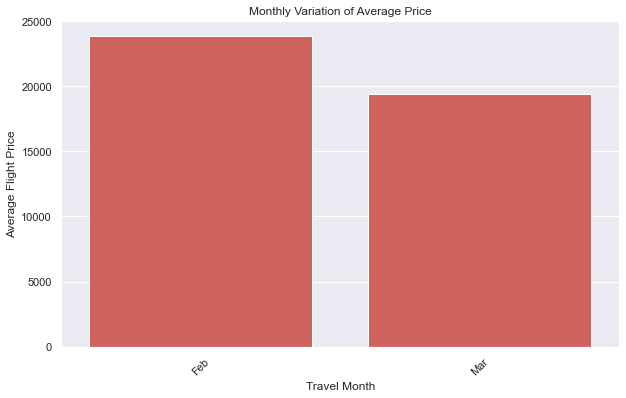

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette='Spectral')

# Assuming df_business and df_economy are your dataframes

plt.figure(figsize=(10, 6))

# Business Class
airline_prices = df.groupby("travel_month")["price"].mean().reset_index()
airline_prices = airline_prices.sort_values(by='price', ascending=False)
# airline_prices_business = airline_prices_business[airline_prices_business['travel_month'].isin(['February', 'March'])]

sns.barplot(x=airline_prices['travel_month'], y=airline_prices['price'])
plt.xlabel('Travel Month')
plt.ylabel('Average Flight Price')
plt.title('Monthly Variation of Average Price')
custom_labels = ['Feb', 'Mar']
plt.xticks(range(len(custom_labels)), custom_labels, rotation=45)
plt.show()

# Feature Engineering

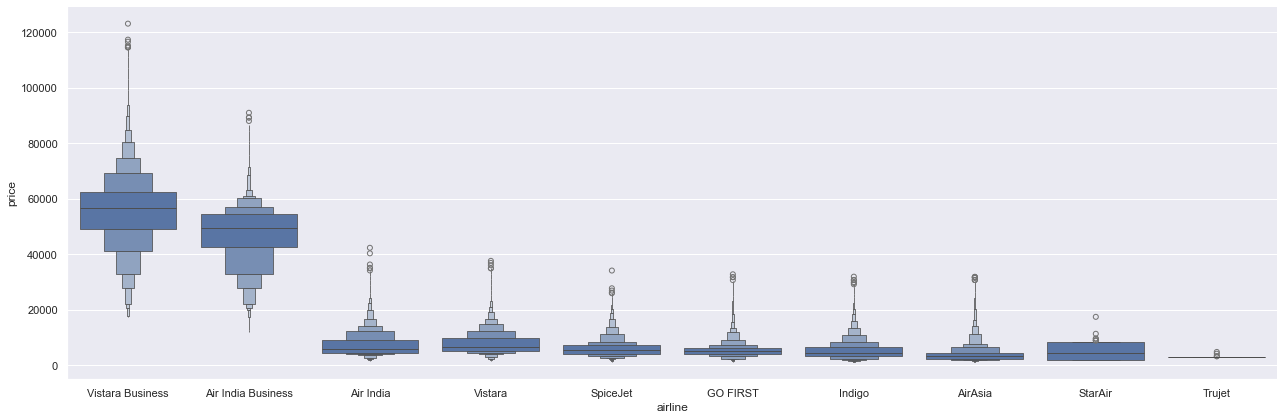

In [89]:
sns.set()
sns.catplot(y = "price", x = "airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [90]:
df["stop"] = df["stop"].replace({'non-stop': 0, '1-stop':1, '2+-stop':2})

In [91]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,travel_day,travel_month,departure_hour,departure_minute,arrival_hour,arrival_minute,duration_in_mins,Weekend,departure_time_of_day,arrival_time_of_day,Day_of_Week,class
0,2022-02-11,Air India Business,2023-12-13 18:00:00,Delhi,02h 00m,0,2023-12-13 20:00:00,Mumbai,25612,11,2,18,0,20,0,120,0,Night,Night,Friday,Business
1,2022-02-11,Air India Business,2023-12-13 19:00:00,Delhi,02h 15m,0,2023-12-13 21:15:00,Mumbai,25612,11,2,19,0,21,15,135,0,Night,Night,Friday,Business
2,2022-02-11,Air India Business,2023-12-13 20:00:00,Delhi,24h 45m,1,2023-12-13 20:45:00,Mumbai,42220,11,2,20,0,20,45,1485,0,Night,Night,Friday,Business
3,2022-02-11,Air India Business,2023-12-13 21:25:00,Delhi,26h 30m,1,2023-12-13 23:55:00,Mumbai,44450,11,2,21,25,23,55,1590,0,Night,Night,Friday,Business
4,2022-02-11,Air India Business,2023-12-13 17:15:00,Delhi,06h 40m,1,2023-12-13 23:55:00,Mumbai,46690,11,2,17,15,23,55,400,0,Noon,Night,Friday,Business


In [92]:
df.drop(['date', 'dep_time', 'time_taken', 'arr_time', 'departure_hour', 'departure_minute', 'arrival_hour', 'arrival_minute', 
         'duration_in_mins', 'Day_of_Week'], axis=1, inplace=True)

In [162]:
df.head()

,airline,from,stop,to,price,travel_day,travel_month,Weekend,departure_time_of_day,arrival_time_of_day,class
0,Air India Business,Delhi,0,Mumbai,25612,11,2,0,Night,Night,Business
1,Air India Business,Delhi,0,Mumbai,25612,11,2,0,Night,Night,Business
2,Air India Business,Delhi,1,Mumbai,42220,11,2,0,Night,Night,Business
3,Air India Business,Delhi,1,Mumbai,44450,11,2,0,Night,Night,Business
4,Air India Business,Delhi,1,Mumbai,46690,11,2,0,Noon,Night,Business


In [166]:
df_encoded = pd.get_dummies(df, columns=['airline', 'from', 'to', 'departure_time_of_day', 'arrival_time_of_day', 'travel_month',
                                         'travel_day'], prefix=['airline', 'source', 'destination', 'departure_time_of_day', 
                                                                'arrival_time_of_day', 'travel_month', 'travel_day'])


In [167]:
df_encoded.head()

,stop,price,Weekend,class,airline_Air India,airline_Air India Business,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,airline_Vistara Business,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,departure_time_of_day_Early Morning,departure_time_of_day_Morning,departure_time_of_day_Night,departure_time_of_day_Noon,arrival_time_of_day_Early Morning,arrival_time_of_day_Morning,arrival_time_of_day_Night,arrival_time_of_day_Noon,travel_month_2,travel_month_3,travel_day_1,travel_day_2,travel_day_3,travel_day_4,travel_day_5,travel_day_6,travel_day_7,travel_day_8,travel_day_9,travel_day_10,travel_day_11,travel_day_12,travel_day_13,travel_day_14,travel_day_15,travel_day_16,travel_day_17,travel_day_18,travel_day_19,travel_day_20,travel_day_21,travel_day_22,travel_day_23,travel_day_24,travel_day_25,travel_day_26,travel_day_27,travel_day_28,travel_day_29,travel_day_30,travel_day_31
0,0,25612,0,Business,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,25612,0,Business,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,42220,0,Business,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,44450,0,Business,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,46690,0,Business,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [168]:
df_encoded.drop("class", axis=1, inplace=True)

## Splitting of the data

In [170]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [171]:
# Normalisation using MinMax Scaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_train)
df_train_scaled_normalisation = pd.DataFrame(scaled_data, columns=X_train.columns)

scaled_data = scaler.transform(X_test)
df_test_scaled_normalisation = pd.DataFrame(scaled_data, columns=X_test.columns)

In [172]:
df_train_scaled_normalisation

,stop,Weekend,airline_Air India,airline_Air India Business,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,airline_Vistara Business,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,departure_time_of_day_Early Morning,departure_time_of_day_Morning,departure_time_of_day_Night,departure_time_of_day_Noon,arrival_time_of_day_Early Morning,arrival_time_of_day_Morning,arrival_time_of_day_Night,arrival_time_of_day_Noon,travel_month_2,travel_month_3,travel_day_1,travel_day_2,travel_day_3,travel_day_4,travel_day_5,travel_day_6,travel_day_7,travel_day_8,travel_day_9,travel_day_10,travel_day_11,travel_day_12,travel_day_13,travel_day_14,travel_day_15,travel_day_16,travel_day_17,travel_day_18,travel_day_19,travel_day_20,travel_day_21,travel_day_22,travel_day_23,travel_day_24,travel_day_25,travel_day_26,travel_day_27,travel_day_28,travel_day_29,travel_day_30,travel_day_31
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240204,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240205,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240206,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,
1. heatmap
2. feature_importance_

In [88]:
df_encoded.head()

,stop,price,Weekend,airline_Air India,airline_Air India Business,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,airline_Vistara Business,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,departure_time_of_day_Early Morning,departure_time_of_day_Morning,departure_time_of_day_Night,departure_time_of_day_Noon,arrival_time_of_day_Early Morning,arrival_time_of_day_Morning,arrival_time_of_day_Night,arrival_time_of_day_Noon,travel_month_2,travel_month_3,travel_day_1,travel_day_2,travel_day_3,travel_day_4,travel_day_5,travel_day_6,travel_day_7,travel_day_8,travel_day_9,travel_day_10,travel_day_11,travel_day_12,travel_day_13,travel_day_14,travel_day_15,travel_day_16,travel_day_17,travel_day_18,travel_day_19,travel_day_20,travel_day_21,travel_day_22,travel_day_23,travel_day_24,travel_day_25,travel_day_26,travel_day_27,travel_day_28,travel_day_29,travel_day_30,travel_day_31
0,0,25612,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,25612,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,42220,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,44450,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,46690,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df.head()

,airline,from,stop,to,price,travel_day,travel_month,Weekend,departure_time_of_day,arrival_time_of_day,class
0,Air India Business,Delhi,0,Mumbai,25612,11,2,0,Night,Night,Business
1,Air India Business,Delhi,0,Mumbai,25612,11,2,0,Night,Night,Business
2,Air India Business,Delhi,1,Mumbai,42220,11,2,0,Night,Night,Business
3,Air India Business,Delhi,1,Mumbai,44450,11,2,0,Night,Night,Business
4,Air India Business,Delhi,1,Mumbai,46690,11,2,0,Noon,Night,Business


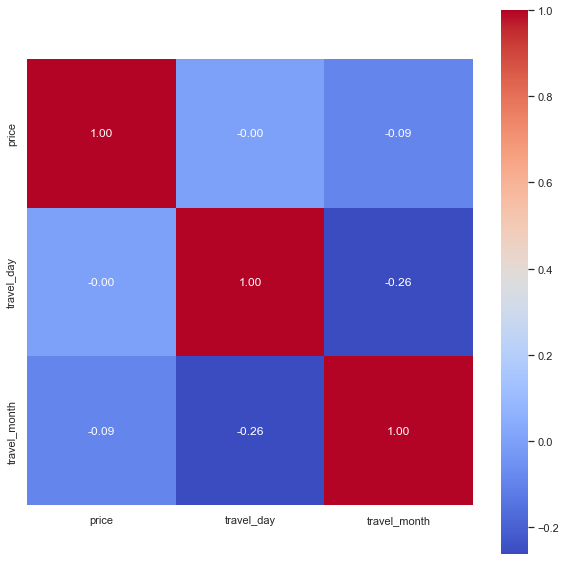

In [90]:
np.random.seed(42)

cols = ["price", "travel_day", "travel_month"]
plt.figure(figsize = (10,10))
corr_matrix = np.corrcoef(df[cols], rowvar=False)

# Create a mask to hide the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


# Plot the lower triangle of the correlation matrix
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, xticklabels=df.columns, yticklabels=df.columns)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, xticklabels=cols, yticklabels=cols)
plt.show()

In [91]:
selection = ExtraTreesRegressor()
selection.fit(df_train_scaled_normalisation, y_train)

ExtraTreesRegressor()

In [92]:
print(selection.feature_importances_)

[3.71386117e-02 4.83813505e-04 7.64637602e-04 3.10263385e-01
 3.64723639e-04 7.79273945e-05 3.18957843e-04 5.66368962e-05
 9.25000945e-07 7.73958050e-07 7.01084285e-04 6.00972003e-01
 9.01022395e-04 7.86006798e-04 5.04798414e-03 1.27344003e-03
 2.08357222e-03 2.34382597e-03 7.66584209e-04 5.84550378e-04
 4.36371840e-03 1.64032655e-03 2.26613986e-03 1.85069578e-03
 4.90915573e-04 1.27482870e-03 1.08640904e-03 1.07003374e-03
 2.71076612e-04 9.18752665e-04 1.42165883e-03 1.17418951e-03
 4.04434604e-03 4.18924496e-03 1.38623195e-04 1.53859283e-04
 1.03993601e-04 8.50297058e-05 1.06382684e-04 1.45046480e-04
 1.05524267e-04 6.80435731e-05 1.01779558e-04 7.47536270e-05
 5.61533086e-04 9.07769792e-04 9.00964967e-04 4.93491235e-04
 4.48829683e-04 2.80650538e-04 2.77208997e-04 1.90226743e-04
 2.48433767e-04 3.25327981e-04 1.54087825e-04 1.77786594e-04
 1.90458194e-04 1.45287614e-04 2.37206211e-04 6.21456674e-04
 6.98337769e-04 7.63609731e-04 1.01730264e-04 1.00147564e-04
 9.96174240e-05]


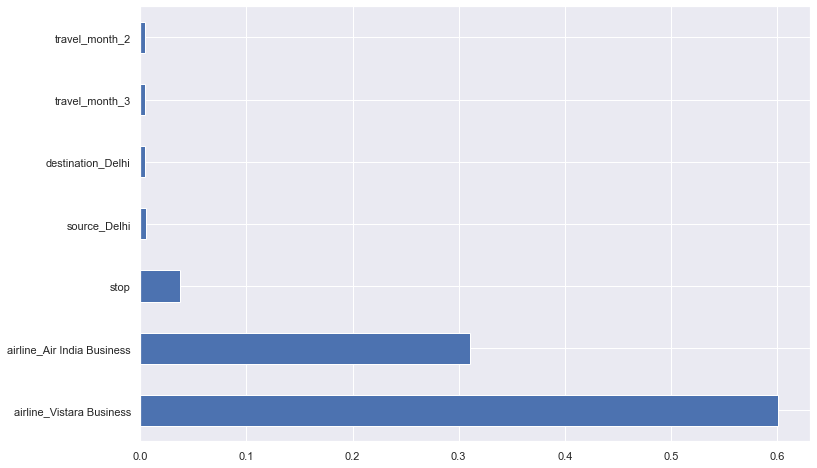

In [95]:
#plot graph of feature importances for better visualization

sns.set()

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=df_train_scaled_normalisation.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

# Modelling

# MLR

In [99]:
df_train_scaled_normalisation

,stop,Weekend,airline_Air India,airline_Air India Business,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,airline_Vistara Business,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,departure_time_of_day_Early Morning,departure_time_of_day_Morning,departure_time_of_day_Night,departure_time_of_day_Noon,arrival_time_of_day_Early Morning,arrival_time_of_day_Morning,arrival_time_of_day_Night,arrival_time_of_day_Noon,travel_month_2,travel_month_3,travel_day_1,travel_day_2,travel_day_3,travel_day_4,travel_day_5,travel_day_6,travel_day_7,travel_day_8,travel_day_9,travel_day_10,travel_day_11,travel_day_12,travel_day_13,travel_day_14,travel_day_15,travel_day_16,travel_day_17,travel_day_18,travel_day_19,travel_day_20,travel_day_21,travel_day_22,travel_day_23,travel_day_24,travel_day_25,travel_day_26,travel_day_27,travel_day_28,travel_day_29,travel_day_30,travel_day_31
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240204,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240205,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240206,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_MLR = LinearRegression()

model_MLR.fit(df_train_scaled_normalisation, y_train)

Wall time: 473 ms


LinearRegression()

In [101]:
y_pred_MLR = model_MLR.predict(df_test_scaled_normalisation)

r2 = r2_score(y_test, y_pred_MLR)
r2

0.9139258975470962

In [102]:
mae = mean_absolute_error(y_test, y_pred_MLR)
mae

4266.094399946714

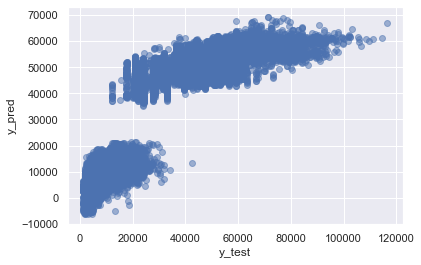

In [103]:
plt.scatter(y_test, y_pred_MLR, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# RF

In [104]:
%%time

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(df_train_scaled_normalisation, y_train)

Wall time: 3min 21s


RandomForestRegressor()

In [105]:
y_pred_rf = model_rf.predict(df_test_scaled_normalisation)

In [106]:
r2 = r2_score(y_test, y_pred_rf)
r2

0.9582777693514206

In [107]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_rf)
mae

2318.307647117406

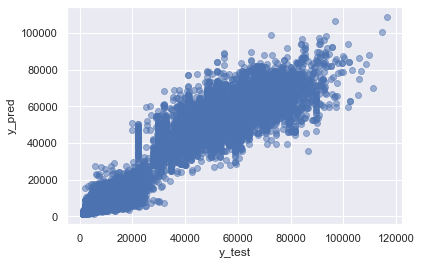

In [108]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Lasso Regression

In [109]:
%%time

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Create and train the Lasso Regression model
model_lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
model_lasso.fit(df_train_scaled_normalisation, y_train)

# Make predictions on the test set
y_pred_lasso = model_lasso.predict(df_test_scaled_normalisation)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 4264.96
Wall time: 13.6 s


C:\Users\nevin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+12, tolerance: 1.238e+10
  model = cd_fast.enet_coordinate_descent(


In [110]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred_lasso)
r2

0.9139350282630675

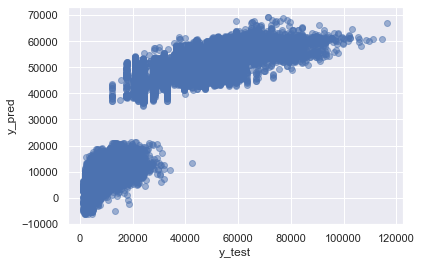

In [111]:
plt.scatter(y_test, y_pred_lasso, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Ridge Regression

In [112]:
%%time

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
model_ridge.fit(df_train_scaled_normalisation, y_train)

# Make predictions on the test set
y_pred_ridge = model_ridge.predict(df_test_scaled_normalisation)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 4265.21
Wall time: 170 ms


In [113]:
r2 = r2_score(y_test, y_pred_ridge)
r2

0.9139345647151831

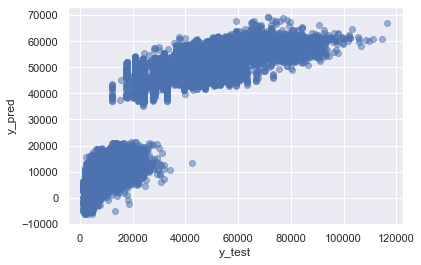

In [114]:
plt.scatter(y_test, y_pred_ridge, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Decision Tree

In [115]:
%%time

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model_decision = DecisionTreeRegressor(random_state=42)
model_decision.fit(df_train_scaled_normalisation, y_train)
y_pred_decision = model_decision.predict(df_test_scaled_normalisation)
mae = mean_absolute_error(y_test, y_pred_decision)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 2392.08
Wall time: 2.49 s


In [116]:
r2 = r2_score(y_test, y_pred_decision)
r2

0.9535428917342643

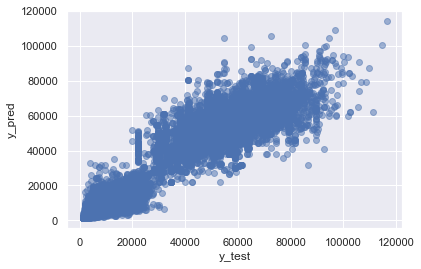

In [117]:
plt.scatter(y_test, y_pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# XGBoost

In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [119]:
%%time

import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model_xgb.fit(df_train_scaled_normalisation, y_train)

y_pred_xgb = model_xgb.predict(df_test_scaled_normalisation)

Wall time: 2.22 s


In [120]:
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 2354.08


In [121]:
r2 = r2_score(y_test, y_pred_xgb)
r2

0.964748871817763

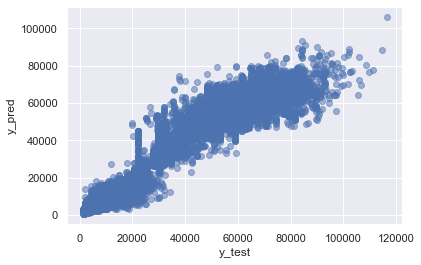

In [122]:
plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [123]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="mae", random_state=42)
model_xgb.fit(df_train_scaled_normalisation, y_train)

y_pred_xgb = model_xgb.predict(df_test_scaled_normalisation)

In [124]:
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 2354.08


In [125]:
r2 = r2_score(y_test, y_pred_xgb)
r2

0.964748871817763

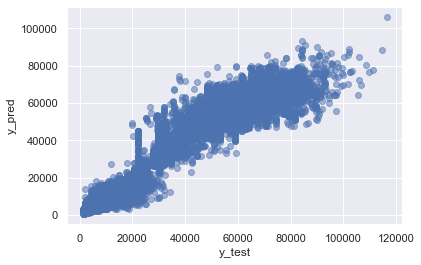

In [126]:
plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# SVM

In [127]:
%%time

from sklearn.svm import SVR

model_svm = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
model_svm.fit(df_train_scaled_normalisation, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(df_test_scaled_normalisation)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_svm)
print(f'Mean absolute Error: {mae:.2f}')

Mean absolute Error: 5561.69
Wall time: 1h 18min 52s


In [128]:
r2 = r2_score(y_test, y_pred_svm)
r2

0.8335704819298384

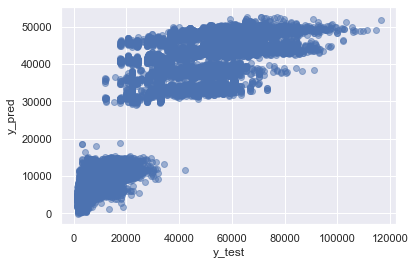

In [129]:
plt.scatter(y_test, y_pred_svm, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MLP

In [130]:
%%time

from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 64), max_iter=1000, random_state=42)
model_mlp.fit(df_train_scaled_normalisation, y_train)

# Make predictions on the test set
y_pred_mlp = model_mlp.predict(df_test_scaled_normalisation)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_mlp)
print(f'Mean absolute Error: {mae:.2f}')

Mean absolute Error: 2315.63
Wall time: 39min 9s


In [131]:
r2 = r2_score(y_test, y_pred_mlp)
r2

0.965055204387011

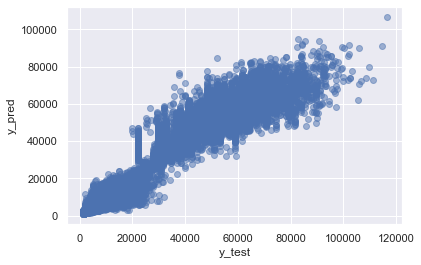

In [132]:
plt.scatter(y_test, y_pred_mlp, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Bagging Regressor

In [133]:
%%time

from sklearn.ensemble import BaggingRegressor

base_regressor = DecisionTreeRegressor()

# Create and train the BaggingRegressor
model_bagging = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)
model_bagging.fit(df_train_scaled_normalisation, y_train)

# Make predictions on the test set
y_pred_bagging = model_bagging.predict(df_test_scaled_normalisation)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_bagging)
print(f'Mean absolute Error: {mae:.2f}')

Mean absolute Error: 2334.76
Wall time: 16.9 s


In [134]:
r2 = r2_score(y_test, y_pred_bagging)
r2

0.9574444532592202

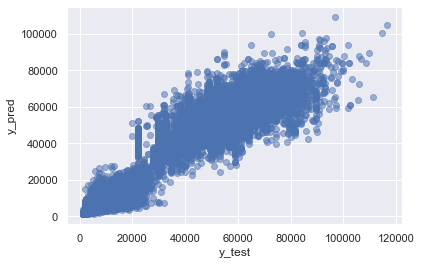

In [135]:
plt.scatter(y_test, y_pred_bagging, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Hyper parameter optimization

In [173]:
%%time

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the MLP classifier
mlp = MLPClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'hidden_layer_sizes': [(128, 64, 64), (128, 128, 64)],
    'activation': ['relu', 'tanh'],
}

# Use GridSearchCV to find the best hyperparameters
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=2, verbose=1)
grid_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_mlp.best_params_
print("Best Hyperparameters:", best_params)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\nevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\nevin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nevin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true

MemoryError: Unable to allocate 20.5 GiB for an array with shape (240208, 11440) and data type int64

In [165]:
%%time

import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Wall time: 5h 55min 45s


In [167]:
best_model = grid_search.best_estimator_

In [168]:
y_hyper_pred = best_model.predict(X_test)

In [171]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_hyper_pred)
print(f'Mean absolute Error: {mae:.2f}')

Mean absolute Error: 2200.91


In [172]:
r2 = r2_score(y_test, y_hyper_pred)
r2

0.9649914832598786